<a href="https://colab.research.google.com/github/prajaktacodes/BharatinternprojectsDS/blob/main/Stock_prediction_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


TASK-1
---
Stock prediction with LSTM


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [57]:
df=pd.read_csv("/content/drive/MyDrive/Tesla.csv - Tesla.csv.csv")

In [58]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [59]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [60]:
df.shape

(1692, 7)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


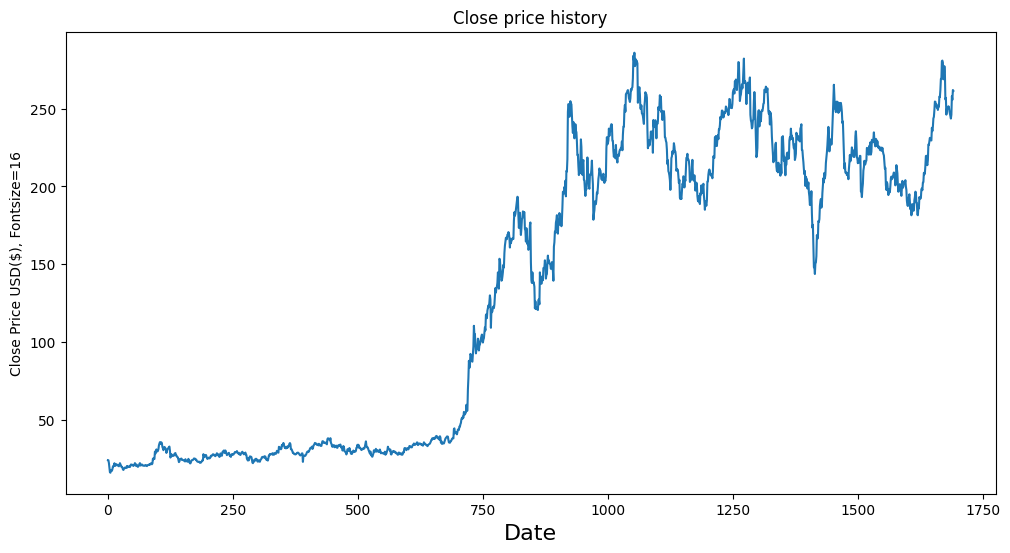

In [62]:
plt.figure(figsize=(12,6))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD($), Fontsize=16')
plt.show()

In [63]:
data= df.filter(['Close']).values

normalise data between 0 and 1 using MinMaxScaler

In [64]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(data)

Train the DATASET

In [65]:
train_data = scaled_data [:int(len(scaled_data)*0.8)]
x_train =[]
y_train =[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

Building LSTM model

In [ ]:
model= Sequential()
model.add(LSTM(50,return_sequences= True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer= 'adam', loss='mean_squared_error')

model.fit(x_train, y_train , epochs= 50, batch_size=32
          )

Epoch 1/50
41/41 [==============================] - 11s 92ms/step - loss: 0.0254
Epoch 2/50
41/41 [==============================] - 5s 113ms/step - loss: 0.0047
Epoch 3/50
41/41 [==============================] - 4s 108ms/step - loss: 0.0041
Epoch 4/50
41/41 [==============================] - 4s 88ms/step - loss: 0.0043
Epoch 5/50
 4/41 [=>............................] - ETA: 3s - loss: 0.0048

prediction on test data

In [ ]:
test_data= scaled_data[int(len(scaled_data)*0.8)- 60:]
x_test = []
y_test = data[int(len(data)*0.8):,:]

for i in range(60,len (test_data)):
    x_test.append (test_data[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions =model.predict(x_test)
predictions =scaler.inverse_transform(predictions)

Visualisation of actual vs predicted values

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Predicted vs Actual stock price')
plt.plot(y_test, label ='Actual Price')
plt.plot(predictions, label = 'predicted Price')
plt.xlabel('Time', fontsize= 16)
plt.ylabel('Stock Price USD($)', fontsize=16)
plt.legend()
plt.show()